In [1]:
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt

 - https://en.wikipedia.org/wiki/Faddeeva_function
 - https://en.wikipedia.org/wiki/Voigt_profile
 - https://fr.wikipedia.org/wiki/Fonction_de_Voigt
 - https://docs.mantidproject.org/nightly/fitting/fitfunctions/PseudoVoigt.html
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erfcx.html#scipy.special.erfcx
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.voigt_profile.html

In [2]:
xlin = np.linspace(-10, 10, 200)

In [3]:
def voigt(x, sigma, gamma):
    z = (x + 1j * gamma) / (sigma * np.sqrt(2))
    y = special.erfcx(-1j * z) / (sigma * np.sqrt(2 * np.pi))
    return np.real(y)

In [4]:
def shifted_voigt(x, sigma, gamma, x0, A=1.):
    z = (x - x0 + 1j * gamma) / (sigma * np.sqrt(2))
    y = special.erfcx(-1j * z) / (sigma * np.sqrt(2 * np.pi))
    return A * np.real(y)

In [5]:
def pseudo_voigt(x, eta, sigma, gamma, x0, A=1.):
    G = stats.norm.pdf(x, scale=sigma, loc=x0)
    L = stats.cauchy.pdf(x, scale=2. * gamma, loc=x0) 
    return A*((1. - eta) * G + eta * L)

In [6]:
y1 = special.voigt_profile(xlin, 1, 1)

In [7]:
y2 = voigt(xlin, 1, 1)

In [8]:
y3 = shifted_voigt(xlin, 1, 1, 2)

In [9]:
y4 = pseudo_voigt(xlin, 0.834, 1, 1, 0)

In [10]:
y5 = pseudo_voigt(xlin, 0.834, 1, 1, 2)

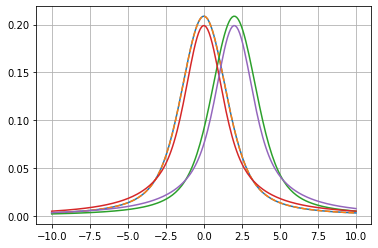

In [11]:
fig, axe = plt.subplots()
axe.plot(xlin, y1)
axe.plot(xlin, y2, "--")
axe.plot(xlin, y3)
axe.plot(xlin, y4)
axe.plot(xlin, y5)
axe.grid()